In [136]:
import numpy as np
from astropy.io import fits, ascii
from astropy.cosmology import FlatLambdaCDM
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
quasar_hdu = fits.open('lab1-data.fits')[1]
quasar_data = quasar_hdu.data

In [116]:
RAs = quasar_data['RA']
DECs = quasar_data['DEC']
Zs = quasar_data['REDSHIFT']

In [117]:
indx = np.array(range(1000))
ra, dec, redshift = RAs, DECs, Zs
ascii.write([indx,ra,dec], 'lab1-target.txt', names=['name', 'ra', 'dec'], overwrite=True)

In [118]:
results = pd.read_csv("result.csv")
u = results['modelMag_u'].values
g = results['modelMag_g'].values
r = results['modelMag_r'].values
i = results['modelMag_i'].values
z = results['modelMag_z'].values
located_indices = results['name']
RAs_located = RAs[located_indices]
DECs_located = DECs[located_indices]
Zs_located = Zs[located_indices]

In [124]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
lum_dist = cosmo.luminosity_distance(Zs_located)

In [125]:
dist_mod = 5 * np.log10(lum_dist.value * 1e6 / 10)

In [126]:
u_abs = u - dist_mod
g_abs = g - dist_mod
i_abs = i - dist_mod
r_abs = r - dist_mod
z_abs = z - dist_mod

In [127]:
from astropy.table import Table


In [133]:
df = pd.DataFrame({"RA":RAs_located, "DEC":DECs_located, "Z":Zs_located, "m_u":u,
                   'm_g':g, 'm_i':i, 'm_r':r, 'm_z':z, 'M_u':u_abs, 'M_g':g_abs, 'M_i':i_abs,
                   'M_r':r_abs, 'M_z':z_abs, "lum_dist":lum_dist, 'dist_mod':dist_mod})

t = Table.from_pandas(df)
t.write("lab1-complete-data.fits")

In [135]:
Table.read("lab1-complete-data.fits")

RA,DEC,Z,m_u,m_g,m_i,m_r,m_z,M_u,M_g,M_i,M_r,M_z,lum_dist,dist_mod
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
117.13700866699219,19.371322631835938,0.6536999940872192,19.105782,18.701864,18.598827,18.695148,18.529638,-23.859637082016075,-24.263555082016076,-24.366592082016076,-24.270271082016077,-24.435781082016078,3918.174883925851,42.965419082016076
130.7330322265625,22.575538635253906,2.714099884033203,20.623468,19.123692,18.564573,18.876184,18.301857,-26.140372857647872,-27.640148857647873,-28.19926785764787,-27.887656857647872,-28.461983857647873,22530.36209598235,46.76384085764787
163.66357421875,5.592619895935059,0.5807999968528748,21.238342,20.24515,19.194542,19.809658,19.347805,-21.415022737128208,-22.40821473712821,-23.45882273712821,-22.84370673712821,-23.305559737128206,3393.6960849312695,42.65336473712821
123.6034164428711,47.45636749267578,1.3731000423431396,19.165319,19.128859,18.699644,18.72534,18.705462,-25.786639833665685,-25.823099833665687,-26.252314833665686,-26.226618833665686,-26.246496833665685,9781.19161162182,44.951958833665685
132.97669982910156,2.2425200939178467,1.2745000123977661,19.37311,19.430727,19.200254,19.203297,19.211481,-25.378751079434156,-25.321134079434156,-25.551607079434156,-25.548564079434158,-25.540380079434158,8920.151199784463,44.75186107943416
175.0653533935547,30.11508560180664,3.7881999015808105,25.34392,21.757792,19.320866,19.781719,18.861334,-22.28827552374884,-25.874403523748843,-28.311329523748842,-27.850476523748842,-28.77086152374884,33607.7242170061,47.63219552374884
205.48696899414062,0.5028740167617798,1.2345999479293823,19.354063,19.295059,19.006502,19.045935,19.048372,-25.312347905456217,-25.37135190545622,-25.659908905456216,-25.620475905456217,-25.618038905456217,8575.948830670137,44.66641090545622
120.83368682861328,25.43400764465332,0.4771000146865845,18.02232,17.679121,17.661888,17.813536,17.571049,-24.11692377920931,-24.46012277920931,-24.477355779209308,-24.32570777920931,-24.56819477920931,2678.2354600799713,42.13924377920931
231.78990173339844,22.30058479309082,1.4677000045776367,19.576178,19.321636,18.864275,19.068722,18.91132,-25.554519569362533,-25.80906156936253,-26.266422569362533,-26.06197556936253,-26.219377569362532,10620.366737883976,45.13069756936253


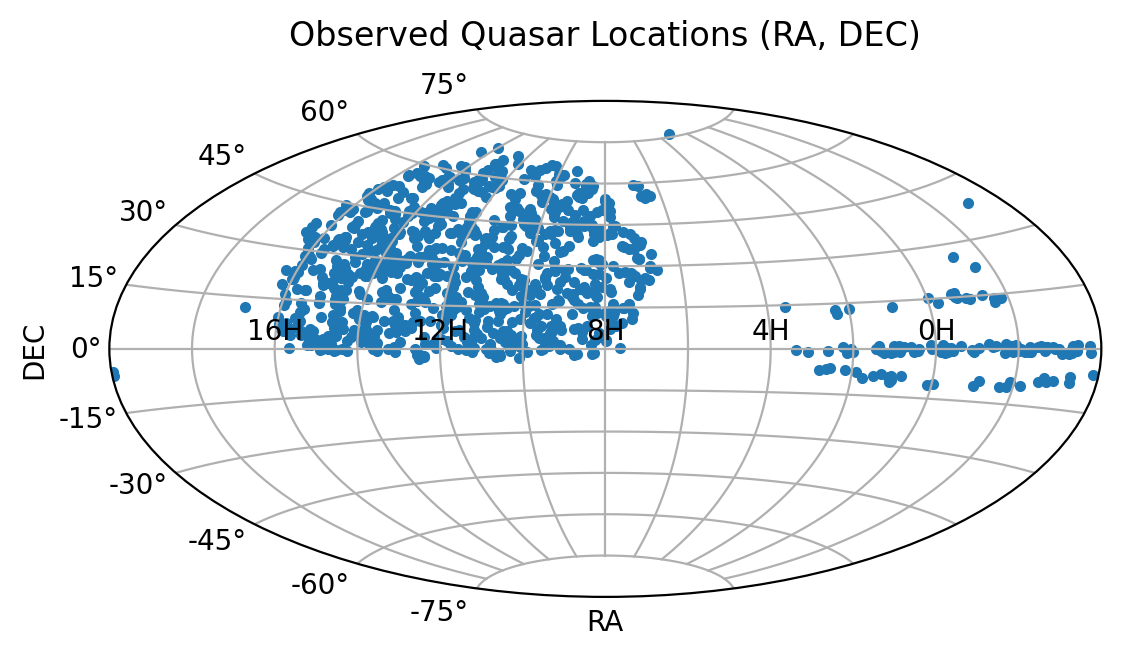

In [190]:
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=(RAs_located+120)*u.degree, dec=DECs_located*u.degree, frame='icrs')
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian
plt.figure(dpi=200)
plt.subplot(projection="aitoff")
ax = plt.gca()
ax.plot(ra_rad, dec_rad, 'o', markersize=3, zorder=0)
ax.set_xticklabels(['', '16H', '', '12H', '', '8H', '', '4H', '', '0H', ''], zorder=10)
plt.title("Observed Quasar Locations (RA, DEC)", pad=20)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.grid(True)

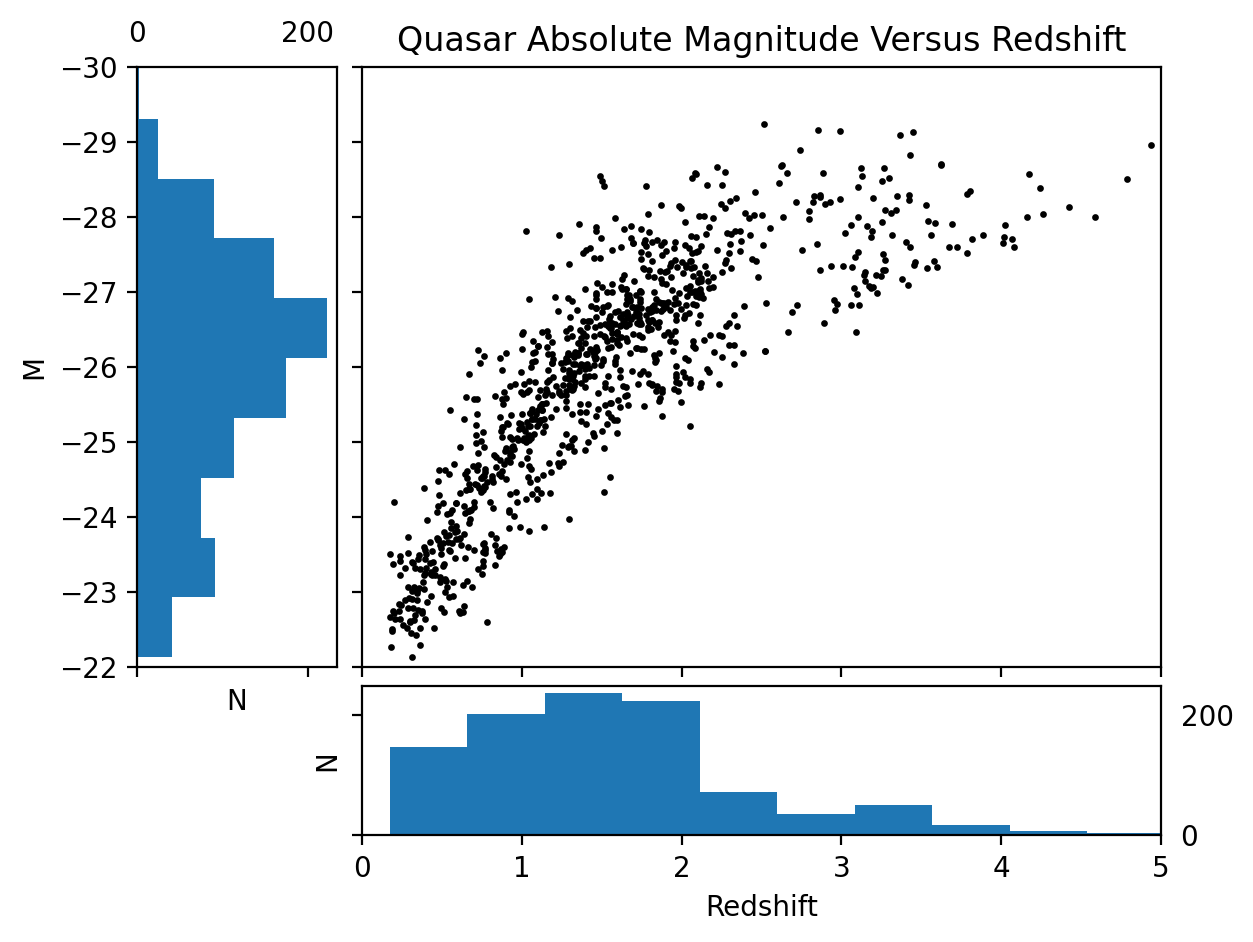

In [268]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    #ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, orientation = 'horizontal')
    ax_histy.hist(y, bins=bins, orientation='vertical')


fig = plt.figure(dpi = 200)
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[0, 1])
ax.set_ylim(-22, -30)
ax.set_xlim(0, 5)
ax.scatter(Zs_located, i_abs, color = 'black', s =2)
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xticks = ax.get_xticks().copy()
yticks = ax.get_yticks().copy()

ax_histy = fig.add_subplot(gs[0, 0], sharey = ax)
ax_histy.hist(i_abs, orientation = 'horizontal')

ax_histy.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="x", labeltop=True)

ax_histx = fig.add_subplot(gs[1, 1], sharex = ax)
ax_histx.hist(Zs_located)

ax_histx.tick_params(axis="y", labelright=True)
ax_histx.tick_params(axis="y", labelleft=False)



ax_histx.set_xticks(xticks)
ax_histx.set_xticklabels(xticklabels)

# ax_histy.set_yticks(yticks)
# ax_histy.set_yticklabels(yticklabels)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
ax.tick_params(axis="y", labelright=False)
ax.tick_params(axis="y", labelleft=False)
ax.tick_params(axis="y", labelright=False)
ax.tick_params(axis="x", labelbottom=False)

ax_histx.set_xlabel("Redshift")
ax_histx.set_ylabel("N")
ax_histy.set_ylabel("M")
ax_histy.set_xlabel("N")

ax.set_title("Quasar Absolute Magnitude Versus Redshift")
plt.show()
